In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
######### Read the data ##########

infile = open('faces.csv','r')
img_data = infile.read().strip().split('\n')
faces = np.reshape([map(int,a.strip().split(',')) for a in img_data],(400,4096))

In [3]:
######### Global Variable ##########

image_count = 0

In [4]:
######### Function that normalizes a vector x (i.e. |x|=1 ) #########

# > numpy.linalg.norm(x, ord=None, axis=None, keepdims=False) 
#   This function is able to return one of eight different matrix norms, 
#   or one of an infinite number of vector norms (described below), 
#   depending on the value of the ord parameter.

def normalize(U):
    return U / LA.norm(U) 

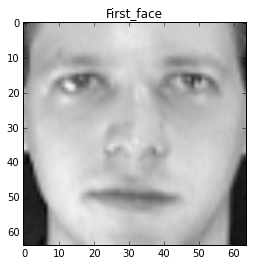

In [5]:
######### Display first face #########

# Useful functions:
# > numpy.reshape(a, newshape, order='C')
#   Gives a new shape to an array without changing its data.
# > matplotlib.pyplot.figure()
# 	Creates a new figure.
# > matplotlib.pyplot.title()
#	Set a title of the current axes.
# > matplotlib.pyplot.imshow()
#	Display an image on the axes.
#	Note: You need a matplotlib.pyplot.show() at the end to display all the figures.

first_face = np.reshape(faces[0],(64,64),order='F')
image_count+=1
plt.figure(image_count)
plt.title('First_face')
plt.imshow(first_face,cmap=plt.cm.gray)

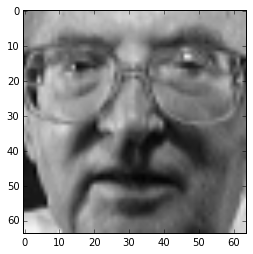

In [6]:
########## display a random face ###########

# Useful functions:
# > numpy.random.choice(a, size=None, replace=True, p=None)
#   Generates a random sample from a given 1-D array
# > numpy.ndarray.shape()
#   Tuple of array dimensions.

#### Your Code Here ####

from random import choice
random_face = np.reshape(choice(faces),(64,64),order='F')
plt.imshow(random_face,cmap=plt.cm.gray)

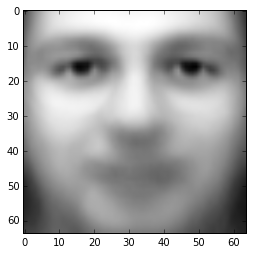

In [7]:
########## compute and display the mean face ###########

# Useful functions:
# > numpy.mean(a, axis='None', ...)
#   Compute the arithmetic mean along the specified axis.
#   Returns the average of the array elements. The average is taken over 
#   the flattened array by default, otherwise over the specified axis. 
#   float64 intermediate and return values are used for integer inputs.

#### Your Code Here ####

mean = np.mean(faces, axis=0)
mean_face = np.reshape(mean,(64,64),order='F')
plt.imshow(mean_face,cmap=plt.cm.gray)

In [8]:
######### substract the mean from the face images and get the centralized data matrix A ###########

# Useful functions:
# > numpy.repeat(a, repeats, axis=None)
#   Repeat elements of an array.

#### Your Code Here ####

centralized = faces - np.mean(faces, axis=0)

In [9]:
######### calculate the eigenvalues and eigenvectors of the covariance matrix #####################

# Useful functions:
# > numpy.matrix()
#   Returns a matrix from an array-like object, or from a string of data. 
#   A matrix is a specialized 2-D array that retains its 2-D nature through operations. 
#   It has certain special operators, such as * (matrix multiplication) and ** (matrix power).

# > numpy.matrix.transpose(*axes)
#   Returns a view of the array with axes transposed.

# > numpy.linalg.eig(a)[source]
#   Compute the eigenvalues and right eigenvectors of a square array.
#   The eigenvalues, each repeated according to its multiplicity. 
#   The eigenvalues are not necessarily ordered. 

#### Your Code Here ####

covariance = np.cov(centralized, rowvar=False)
values, V = LA.eigh(covariance)

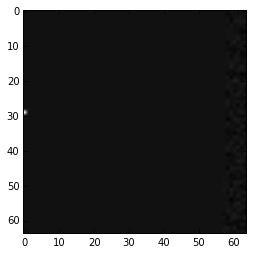

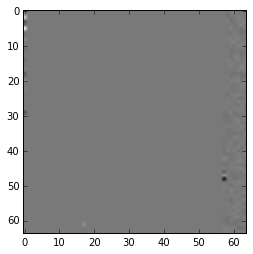

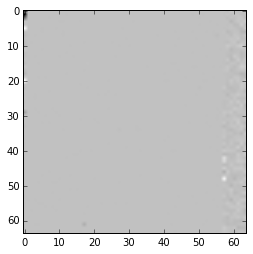

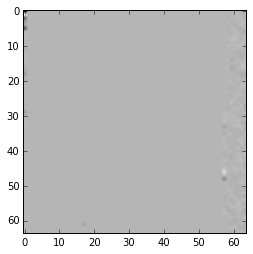

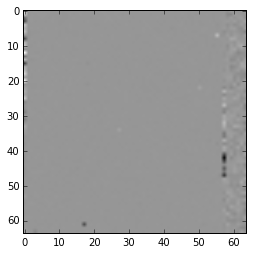

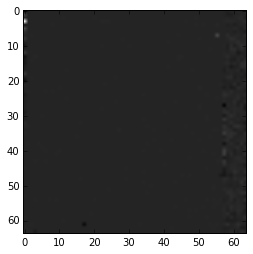

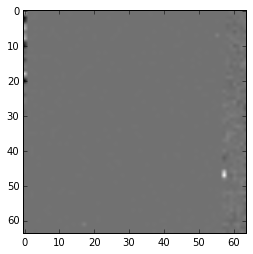

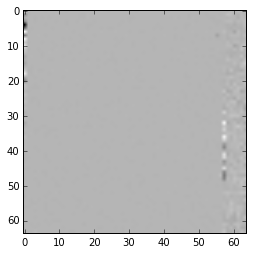

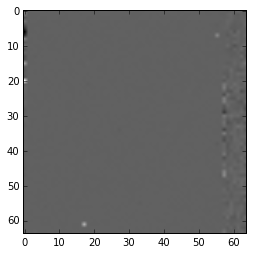

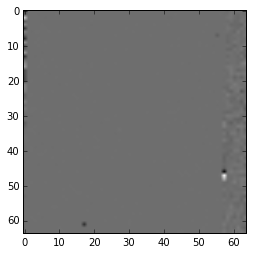

In [10]:
########## Display the first 10 principal components ##################

#### Your Code Here ####

for i in range(10):
    eig_face = np.reshape(V[i],(64,64),order='F')
    plt.figure()
    plt.imshow(eig_face,cmap=plt.cm.gray)

In [11]:
def reconstruct(image, D):
    return sum(np.dot(faces[0], V[i]) * V[i] for i in range(D)) + mean

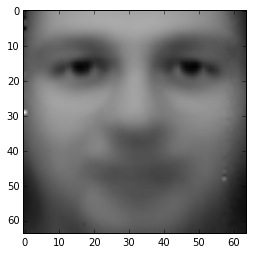

In [12]:
########## Reconstruct the first face using the first two PCs #########

#### Your Code Here ####

re = reconstruct(faces[0], 2)
re_face = np.reshape(re,(64,64),order='F')
plt.imshow(re_face,cmap=plt.cm.gray)

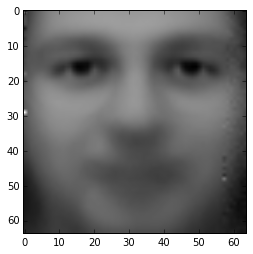

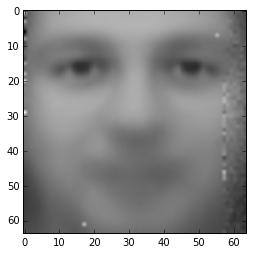

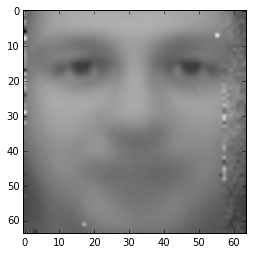

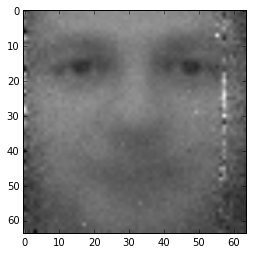

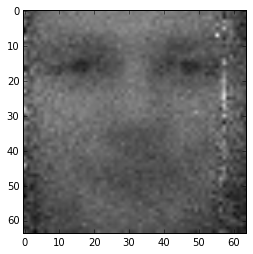

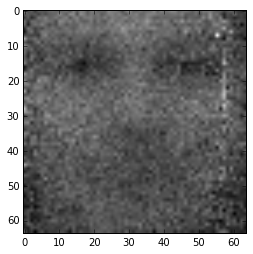

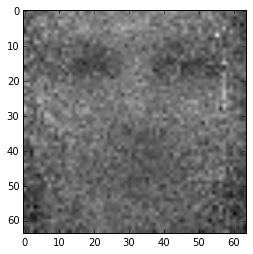

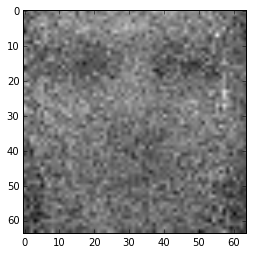

In [13]:
########## Reconstruct random face using the first 5, 10, 25, 50, 100, 200, 300, 399  PCs ###########

#### Your Code Here ####

for D in (5, 10, 25, 50, 100, 200, 300, 399):
    re = reconstruct(choice(faces), D)
    re_face = np.reshape(re,(64,64),order='F')
    plt.figure()
    plt.imshow(re_face,cmap=plt.cm.gray)

(0, 1)

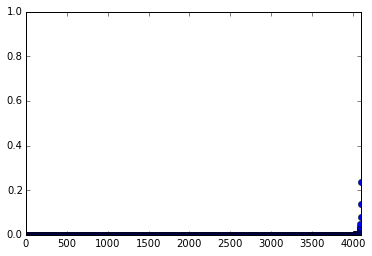

In [14]:
total = np.sum(values)
proportions = values / total
plt.plot(np.arange(len(values)), proportions, 'bo')
plt.xlim(0, len(values))
plt.ylim(0, 1)